<a href="https://colab.research.google.com/github/yaniv256/ecosys/blob/master/demos/guru_scripts/tigergraph_notebook/gsql101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GSQL101 - on a Colab Notebook

## Establish a connection to a TigerGraph server

### Start a [TigerGraph server](https://www.tigergraph.com/cloud/)

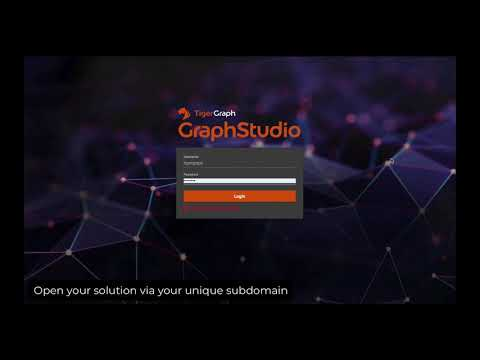

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo(width=896, height=504, id='JARd9ULRP_I')

## Enter your server's ip address and password into the input boxes

In [ ]:
server_ip = input()

yaniv.i.tgcloud.io


In [ ]:
import getpass

password = getpass.getpass()

··········


### Download a certificate from the server

In [ ]:
!openssl s_client -connect $server_ip:14240 < /dev/null 2> /dev/null | openssl x509 -text > my-cert.txt
!ls -l my-cert.txt

-rw-r--r-- 1 root root 8518 Jun 22 13:17 my-cert.txt


### Download the GSQL client java tar file

In [ ]:
import urllib.request

client_version = '2.6.0'

jar_url = ('https://bintray.com/api/ui/download/tigergraphecosys/tgjars/' 
           + 'com/tigergraph/client/gsql_client/' + client_version 
           + '/gsql_client-' + client_version + '.jar')
           
urllib.request.urlretrieve(jar_url, 'gsql_client.jar')

!ls -l gsql_client.jar

-rw-r--r-- 1 root root 671144 Jun 22 13:17 gsql_client.jar


If not running on Colab you need to have the Java JDK runtime installed. You can download it from Oracle's [download page](https://www.oracle.com/java/technologies/javase-downloads.html).

### Define a function to handle input and output to the GSQL client 

In [ ]:
import subprocess, yaml, re

def gsql(query, options=['-g','social']):

    cmd = ['java', '-DGSQL_CLIENT_VERSION=v2_6_0', '-jar', 'gsql_client.jar',
       '-cacert', 'my-cert.txt','-u', 'tigergraph', '-p', password, 
       '-ip', server_ip]

    comp = subprocess.check_output(cmd + options + [query]).decode()
    
    try:
        json_string = re.search('(\{|\[).*$',comp.replace('\n',''))[0]
        json_object = yaml.safe_load(json_string)
    except:
        print(comp)
        return
    else:
        return json_object

## Set up the graph

### Make sure your server is running properly by logging in to TigerStudio
You will need this to upload your data files.

In [ ]:
print('https://' + server_ip + ':14240') 

https://yaniv.i.tgcloud.io:14240


### Use TigerStudio to upload data files to server

Run the these cells. If you're runing the notebook on Colab, download the csv files using the folder icon on the left. Go to GraphStudio and select `Map Data to Graph` and `Add data file`. Upload the csv files. After uploading you can hit `Cancel`, as the files are already on the server. You only need to do this once.

In [ ]:
%%writefile person.csv
name,gender,age,state
Tom,male,40,ca
Dan,male,34,ny
Jenny,female,25,tx
Kevin,male,28,az
Amily,female,22,ca
Nancy,female,20,ky
Jack,male,26,fl

Overwriting person.csv


In [ ]:
%%writefile friendship.csv
person1,person2,date
Tom,Dan,2017-06-03
Tom,Jenny,2015-01-01
Dan,Jenny,2016-08-03
Jenny,Amily,2015-06-08
Dan,Nancy,2016-01-03
Nancy,Jack,2017-03-02
Dan,Kevin,2015-12-30

Overwriting friendship.csv


### Clear the graph

In [ ]:
gsql('drop all', options=[])

Trying version: v2_6_0
Connecting to yaniv.i.tgcloud.io
If there is any relative path, it is relative to tigergraph/dev/gdk/gsql
Dropping all, about 1 minute ...
Abort all active loading jobs
Try to abort all loading jobs on graph social, it may take a while ...
[ABORT_SUCCESS] No active Loading Job to abort.

Shutdown restpp gse gpe ...
Graph store /home/tigergraph/tigergraph/gstore/0/ has been cleared!
Everything is dropped.



### Create the graph schema

See [GSQL 101 - Module 1: Graph Schema](https://youtu.be/him2Uy3Nn7Y)


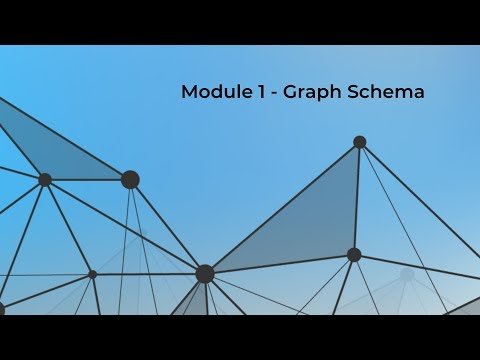

In [ ]:
YouTubeVideo(width=896, height=504, id='him2Uy3Nn7Y')

In [ ]:
gsql('''
create vertex person (primary_id name string, name string, age int, 
                      gender string, state string)
                      
create undirected edge friendship (from person, to person, 
                                   connect_day datetime)

create graph social (person, friendship)
''', options=[])

Trying version: v2_6_0
Connecting to yaniv.i.tgcloud.io
If there is any relative path, it is relative to tigergraph/dev/gdk/gsql
The vertex type person is created.
The edge type friendship is created.

Restarting gse gpe restpp ...

Finish restarting services in 10.435 seconds!
The graph social is created.



### Create data loading job and run it

See [GSQL 101 - Module 2: Data Loading](https://youtu.be/IFfR3tQNhoA)

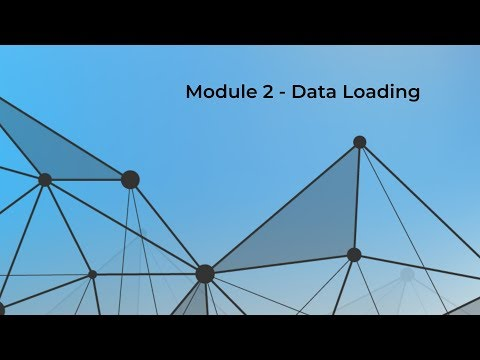

In [ ]:
YouTubeVideo(width=896, height=504, id='IFfR3tQNhoA')

In [ ]:
gsql('''
create loading job load_social for graph social {
    define filename file1="~/tigergraph/loadingData/person.csv";
    define filename file2="~/tigergraph/loadingData/friendship.csv";
    
    load file1 to vertex person values ($"name", $"name", $"age", $"gender", $"state") 
       using header="true", separator=",";
    
    load file2 to edge friendship values ($"person1", $"person2", $"date") 
       using header="true", separator=",";   
}

run loading job load_social
''')

Trying version: v2_6_0
Connecting to yaniv.i.tgcloud.io
If there is any relative path, it is relative to tigergraph/dev/gdk/gsql
The job load_social is created.
[Tip: Use "CTRL + C" to stop displaying the loading status update, then use "SHOW LOADING STATUS jobid" to track the loading progress again]
[Tip: Manage loading jobs with "ABORT/RESUME LOADING JOB jobid"]
Starting the following job, i.e.
  JobName: load_social, jobid: social.load_social.file.m1.1592831968705
  Loading log: '/home/tigergraph/tigergraph/logs/restpp/restpp_loader_logs/social/social.load_social.file.m1.1592831968705.log'

Job "social.load_social.file.m1.1592831968705" loading status
[RUNNING] m1 ( Finished: 0 / Total: 2 )
Job "social.load_social.file.m1.1592831968705" loading status
[RUNNING] m1 ( Finished: 2 / Total: 2 )
  [LOADED]
  +--------------------------------------------------------------------------------------------------+
  |                                              FILENAME |   LOADED LINES |   AV

In [ ]:
gsql('ls')

Trying version: v2_6_0
Connecting to yaniv.i.tgcloud.io
If there is any relative path, it is relative to tigergraph/dev/gdk/gsql
---- Graph social
Vertex Types: 
  - VERTEX person(PRIMARY_ID name STRING, name STRING, age INT, gender STRING, state STRING) WITH STATS="OUTDEGREE_BY_EDGETYPE"
Edge Types: 
  - UNDIRECTED EDGE friendship(FROM person, TO person, connect_day DATETIME)

Graphs: 
  - Graph social(person:v, friendship:e)
Jobs: 
  - CREATE LOADING JOB load_social FOR GRAPH social {
      DEFINE FILENAME file2 = "~/tigergraph/loadingData/friendship.csv";
      DEFINE FILENAME file1 = "~/tigergraph/loadingData/person.csv";
      LOAD file1 TO VERTEX person VALUES($"name", $"name", $"age", $"gender", $"state") USING SEPARATOR=",", HEADER="true", EOL="\n";
      LOAD file2 TO EDGE friendship VALUES($"person1", $"person2", $"date") USING SEPARATOR=",", HEADER="true", EOL="\n";
    }

Queries: 







## Built-in `SELECT` queries

See [GSQL 101 - Module 3: Graph Inspection Language](https://youtu.be/akGOSEWMC8I)

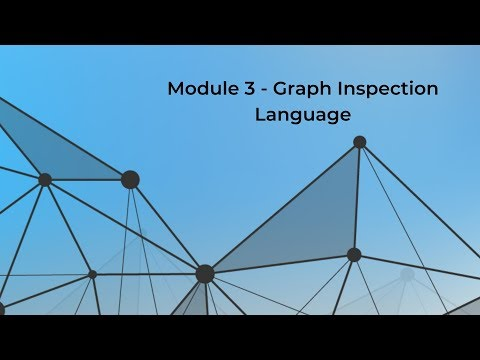

In [ ]:
YouTubeVideo(width=896, height=504, id='akGOSEWMC8I')

### `SELECT` queries return a native Python structure

In [ ]:
q = gsql('select count(*) from person')
q

[{'count': 7, 'v_type': 'person'}]

In [ ]:
q[0]['count']

7

### Since this is GSQL the `FROM` argument can be a pattern 

In [ ]:
gsql('select count() from person-(friendship)-person')

[{'count': 7, 'e_type': 'friendship'}]

### The `WHERE` arument is a filter on the `FROM` pattern

In [ ]:
gsql('select * from person where primary_id=="Tom"')

[{'attributes': {'age': 40, 'gender': 'male', 'name': 'Tom', 'state': 'ca'},
  'v_id': 'Tom',
  'v_type': 'person'}]

In [ ]:
q = gsql('select * from person where gender=="female"')
q 

[{'attributes': {'age': 20,
   'gender': 'female',
   'name': 'Nancy',
   'state': 'ky'},
  'v_id': 'Nancy',
  'v_type': 'person'},
 {'attributes': {'age': 25,
   'gender': 'female',
   'name': 'Jenny',
   'state': 'tx'},
  'v_id': 'Jenny',
  'v_type': 'person'},
 {'attributes': {'age': 22,
   'gender': 'female',
   'name': 'Amily',
   'state': 'ca'},
  'v_id': 'Amily',
  'v_type': 'person'}]

### Use Python's list comprehension to acess results

In [ ]:
[v['attributes']['age'] for v in q]

[20, 25, 22]

### Transform into a Pandas DataFrame

In [ ]:
import pandas as pd

pd.DataFrame([v['attributes'] for v in q])

,gender,name,state,age
0,female,Nancy,ky,20
1,female,Jenny,tx,25
2,female,Amily,ca,22


## User defined queries

See [GSQL 101 - Module 4: Basic GSQL](https://youtu.be/eK6f7qnylj0) 

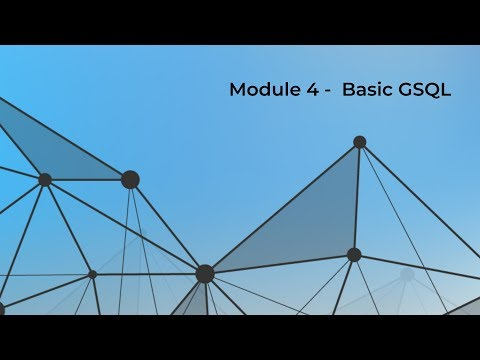

In [ ]:
YouTubeVideo(width=896, height=504, id='eK6f7qnylj0')

### Queries can saved and compiled

In [ ]:
gsql('''
create query hello(vertex<person> p) for graph social{
    
    start = {p};
    tgt = select t from start:s-(friendship:e)-person:t ;
    print tgt;
}

install query hello
''')

Trying version: v2_6_0
Connecting to yaniv.i.tgcloud.io
If there is any relative path, it is relative to tigergraph/dev/gdk/gsql
The query hello has been added!
Start installing queries, about 1 minute ...
hello query: curl -X GET 'https://127.0.0.1:9000/query/social/hello?p=VALUE'. Add -H "Authorization: Bearer TOKEN" if authentication is enabled.

[=================================================================] 100% (1/1) 



### Run the installed query and process the output

In [ ]:
q = gsql('run query hello("Tom")')
q

{'error': False,
 'message': '',
 'results': [{'tgt': [{'attributes': {'age': 34,
      'gender': 'male',
      'name': 'Dan',
      'state': 'ny'},
     'v_id': 'Dan',
     'v_type': 'person'},
    {'attributes': {'age': 25,
      'gender': 'female',
      'name': 'Jenny',
      'state': 'tx'},
     'v_id': 'Jenny',
     'v_type': 'person'}]}],
 'version': {'api': 'v2', 'edition': 'enterprise', 'schema': 0}}

In [ ]:
[v['attributes']['age'] for v in q['results'][0]['tgt']]

[34, 25]

## Accumulators

See [GSQL 101 - Module 5: Advanced GSQL (Accumulators)](https://youtu.be/ysrm9OjVoqg)

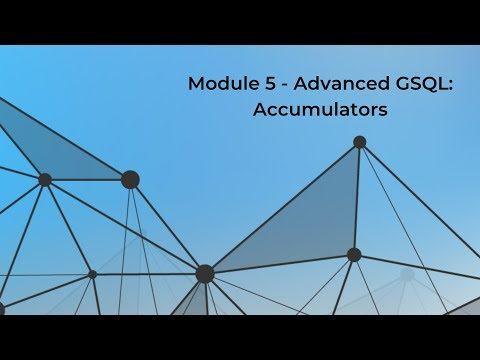

In [ ]:
YouTubeVideo(width=896, height=504, id='ysrm9OjVoqg')

### Measuring hop distance

Measuring hop distance requires that we flag every vertex we visit using a local accumulator `@visited`.

In [ ]:
gsql('''
create query hello2(vertex<person> p) for graph social {
    
    OrAccum @visited = false;
    AvgAccum @@aveAge;
    
    start = {p};
    
    firstHop = select t from start:s-(friendship:e)-person:t
               accum t.@visited += true, s.@visited += true;
    
    secondHop = select t from firstHop:s-(friendship:e)-person:t
                where t.@visited == false
                post_accum @@aveAge += t.age;
    
    print secondHop;
    print @@aveAge;
            
}

install query hello2
''')

Trying version: v2_6_0
Connecting to yaniv.i.tgcloud.io
If there is any relative path, it is relative to tigergraph/dev/gdk/gsql
The query hello2 has been added!
Start installing queries, about 1 minute ...
hello2 query: curl -X GET 'https://127.0.0.1:9000/query/social/hello2?p=VALUE'. Add -H "Authorization: Bearer TOKEN" if authentication is enabled.

[=================================================================] 100% (1/1) 



### Excluding visited verticies
Results exclude Jenny and Dan even though they are a friend of a friend of Tom because they are also direct friends of Tom

In [ ]:
q = gsql('run query hello2("Tom")')
q

{'error': False,
 'message': '',
 'results': [{'secondHop': [{'attributes': {'@visited': False,
      'age': 22,
      'gender': 'female',
      'name': 'Amily',
      'state': 'ca'},
     'v_id': 'Amily',
     'v_type': 'person'},
    {'attributes': {'@visited': False,
      'age': 28,
      'gender': 'male',
      'name': 'Kevin',
      'state': 'az'},
     'v_id': 'Kevin',
     'v_type': 'person'},
    {'attributes': {'@visited': False,
      'age': 20,
      'gender': 'female',
      'name': 'Nancy',
      'state': 'ky'},
     'v_id': 'Nancy',
     'v_type': 'person'}]},
  {'@@aveAge': 23.33333}],
 'version': {'api': 'v2', 'edition': 'enterprise', 'schema': 0}}

### Global accumulators 
We can verify that the global accumulator `@@aveAge` did its job correctly.

In [ ]:
q['results'][1]['@@aveAge']

23.33333

In [ ]:
ages = [v['attributes']['age'] for v in q['results'][0]['secondHop']]
ages

[22, 28, 20]

In [ ]:
sum(ages)/len(ages)

23.333333333333332